**Customer Churn Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Interactive Data Visualization

In [2]:
customer_churn_data = pd.read_csv("Churn_Dateset.csv")
customer_churn_data

Anonymous Customer ID  Call  Failure  Complains  Subscription  Length  \
0                         1              8          0                    38   
1                         2              0          0                    39   
2                         3             10          0                    37   
3                         4             10          0                    38   
4                         5              3          0                    38   
...                     ...            ...        ...                   ...   
3145                   3146             21          0                    19   
3146                   3147             17          0                    17   
3147                   3148             13          0                    18   
3148                   3149              7          0                    11   
3149                   3150              8          1                    11   

      Charge  Amount  Seconds of Use  Frequency of use  Frequency of SMS  \
0                  0            4370                71                 5   
1                  0             318                 5                 7   
2                  0            2453                60               359   
3                  0            4198                66                 1   
4                  0            2393                58                 2   
...              ...             ...               ...               ...   
3145               2            6697               147                92   
3146               1            9237               177                80   
3147               4            3157                51                38   
3148               2            4695                46               222   
3149               2            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Churn  \
0                          17          3            1       1      0   
1                           4          2            1       2      0   
2                          24          3            1       1      0   
3                          35          1            1       1      0   
4                          33          1            1       1      0   
...                       ...        ...          ...     ...    ...   
3145                       44          2            2       1      0   
3146                       42          5            1       1      0   
3147                       21          3            1       1      0   
3148                       12          3            1       1      0   
3149                        9          3            1       1      1   

      Customer Value  
0            132.600  
1             17.460  
2            181.290  
3            252.480  
4            144.780  
...              ...  
3145         342.765  
3146          50.185  
3147         106.110  
3148         207.450  
3149          55.860  

[3150 rows x 14 columns]

In [3]:
customer_churn_data.drop(['Anonymous Customer ID'], axis =1, inplace= True)

In [4]:
customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Churn                    3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 320.0 KB


In [5]:
# method 1:
for col in customer_churn_data.columns:
        changes= col.lower().replace(" ", "_")#, inplace=True)
        customer_churn_data.rename(columns={col:changes},inplace=True)


In [6]:
customer_churn_data

call__failure  complains  subscription__length  charge__amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      seconds_of_use  frequency_of_use  frequency_of_sms  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      distinct_called_numbers  age_group  tariff_plan  status  churn  \
0                          17          3            1       1      0   
1                           4          2            1       2      0   
2                          24          3            1       1      0   
3                          35          1            1       1      0   
4                          33          1            1       1      0   
...                       ...        ...          ...     ...    ...   
3145                       44          2            2       1      0   
3146                       42          5            1       1      0   
3147                       21          3            1       1      0   
3148                       12          3            1       1      0   
3149                        9          3            1       1      1   

      customer_value  
0            132.600  
1             17.460  
2            181.290  
3            252.480  
4            144.780  
...              ...  
3145         342.765  
3146          50.185  
3147         106.110  
3148         207.450  
3149          55.860  

[3150 rows x 13 columns]

# method 2:
churn_df= churn_df.rename(columns = {"Call  Failure":"call_failure", "Complains": "complains", "Subscription  Length":"subscription(month)",
                                   "Charge  Amount":"charge_amount", "Seconds of Use":"uses(sec)", "Frequency of use":"freq_use", 
                                   "Frequency of SMS":"freq_sms", "Distinct Called Numbers":"distinct_called_num", 
                                   "Age Group":"age_group", "Tariff Plan":"tariff_plan",
                                  "Status":"status", "Churn":"churn", "Customer Value":"customer_value"})
churn_df

In [7]:
customer_churn_data_copy = customer_churn_data.copy()
customer_churn_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call__failure            3150 non-null   int64  
 1   complains                3150 non-null   int64  
 2   subscription__length     3150 non-null   int64  
 3   charge__amount           3150 non-null   int64  
 4   seconds_of_use           3150 non-null   int64  
 5   frequency_of_use         3150 non-null   int64  
 6   frequency_of_sms         3150 non-null   int64  
 7   distinct_called_numbers  3150 non-null   int64  
 8   age_group                3150 non-null   int64  
 9   tariff_plan              3150 non-null   int64  
 10  status                   3150 non-null   int64  
 11  churn                    3150 non-null   int64  
 12  customer_value           3150 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 320.0 KB


In [8]:
# Check for any missing values
assert customer_churn_data_copy.isnull().sum().sum() == 0, "Data contains missing values"

In [9]:
customer_churn_data_copy.columns

Index(['call__failure', 'complains', 'subscription__length', 'charge__amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status',
       'churn', 'customer_value'],
      dtype='object')

In [10]:
# Display the duplicate rows
customer_churn_data_duprow= customer_churn_data_copy[customer_churn_data_copy.duplicated(['call__failure', 'complains', 'subscription__length', 'charge__amount',
                                                       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms','distinct_called_numbers', 'age_group',
                                                        'tariff_plan', 'status', 'churn', 'customer_value'])]
customer_churn_data_duprow

call__failure  complains  subscription__length  charge__amount  \
518               0          0                    37               0   
628               0          0                    35               0   
718               0          0                    37               0   
728               0          0                    36               0   
901               0          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      seconds_of_use  frequency_of_use  frequency_of_sms  \
518                0                 0                 0   
628                0                 0                 0   
718                0                 0                 0   
728                0                 0                 0   
901                0                 0                 0   
...              ...               ...               ...   
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      distinct_called_numbers  age_group  tariff_plan  status  churn  \
518                         0          2            1       2      1   
628                         0          2            1       2      1   
718                         0          2            1       2      1   
728                         0          3            1       2      1   
901                         0          2            1       2      0   
...                       ...        ...          ...     ...    ...   
3145                       44          2            2       1      0   
3146                       42          5            1       1      0   
3147                       21          3            1       1      0   
3148                       12          3            1       1      0   
3149                        9          3            1       1      1   

      customer_value  
518            0.000  
628            0.000  
718            0.000  
728            0.000  
901            0.000  
...              ...  
3145         342.765  
3146          50.185  
3147         106.110  
3148         207.450  
3149          55.860  

[300 rows x 13 columns]

In [11]:
# Remove duplicates based on specific columns
customer_churn_data_nodup = customer_churn_data_copy.drop_duplicates(subset=['call__failure', 'complains', 'subscription__length', 'charge__amount',
                                                                               'seconds_of_use', 'frequency_of_use', 'frequency_of_sms','distinct_called_numbers', 'age_group',
                                                                               'tariff_plan', 'status', 'churn', 'customer_value'])

In [12]:
customer_churn_data_nodup

call__failure  complains  subscription__length  charge__amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3096             17          0                    17               1   
3097             13          0                    18               4   
3099              8          1                    11               2   
3123             26          0                    38               9   
3131              5          1                    38               0   

      seconds_of_use  frequency_of_use  frequency_of_sms  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3096            9237               177                80   
3097            3157                51                38   
3099            1792                25                 7   
3123           10740                99                 8   
3131             933                13                16   

      distinct_called_numbers  age_group  tariff_plan  status  churn  \
0                          17          3            1       1      0   
1                           4          2            1       2      0   
2                          24          3            1       1      0   
3                          35          1            1       1      0   
4                          33          1            1       1      0   
...                       ...        ...          ...     ...    ...   
3096                       42          5            1       1      0   
3097                       21          3            1       1      0   
3099                        9          3            1       1      1   
3123                       44          5            2       1      0   
3131                        6          4            1       2      1   

      customer_value  
0            132.600  
1             17.460  
2            181.290  
3            252.480  
4            144.780  
...              ...  
3096          50.185  
3097         106.110  
3099          55.860  
3123          54.100  
3131          16.395  

[2850 rows x 13 columns]

In [13]:
# check the uses(sec)=6697
check = customer_churn_data_nodup[customer_churn_data_nodup['seconds_of_use']==6697]
check

call__failure  complains  subscription__length  charge__amount  \
2895             19          0                    14               1   
2945             23          0                    24               3   
3095             21          0                    19               2   

      seconds_of_use  frequency_of_use  frequency_of_sms  \
2895            6697               141                84   
2945            6697               153               100   
3095            6697               147                92   

      distinct_called_numbers  age_group  tariff_plan  status  churn  \
2895                       43          1            2       1      0   
2945                       45          2            2       1      0   
3095                       44          2            2       1      0   

      customer_value  
2895         452.220  
2945         346.365  
3095         342.765

In [14]:
def data(col):
    y= customer_churn_data_nodup[col].value_counts()
    return y

In [15]:
data('status')

1    2166
2     684
Name: status, dtype: int64

In [16]:
data('tariff_plan')

1    2621
2     229
Name: tariff_plan, dtype: int64

In [17]:
data('age_group')

3    1296
2     921
4     367
5     154
1     112
Name: age_group, dtype: int64

In [18]:
data('complains')

0    2620
1     230
Name: complains, dtype: int64

In [19]:
data('charge__amount')

0     1575
1      559
2      362
3      192
4       70
5       30
8       19
9       13
7       12
6       11
10       7
Name: charge__amount, dtype: int64

In [20]:
data('churn')

0    2404
1     446
Name: churn, dtype: int64

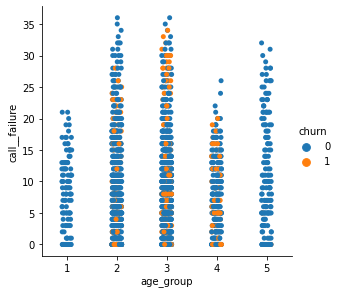

In [21]:
sns.catplot(data= customer_churn_data_nodup, x='age_group', y='call__failure', height= 4, hue= 'churn')

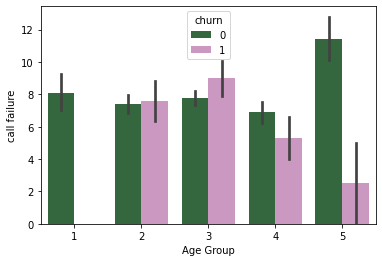

In [22]:
ax = sns.barplot(data= customer_churn_data_nodup, x='age_group', y='call__failure', hue= 'churn', palette= 'cubehelix')
ax.set(xlabel= 'Age Group', ylabel= 'call failure')
plt.show()

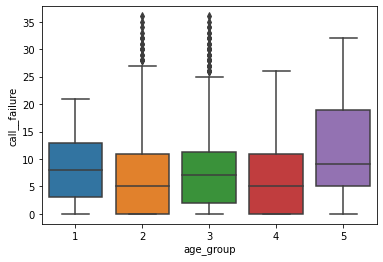

In [23]:
ax= sns.boxplot(data= customer_churn_data_nodup, x='age_group', y='call__failure')

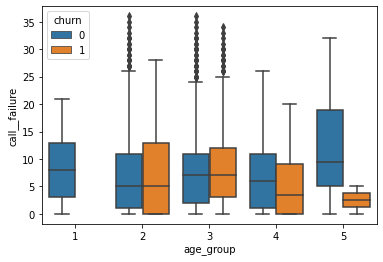

In [24]:
# boxplot after remove the duplicate value
ax= sns.boxplot(data= customer_churn_data_nodup, x='age_group', y='call__failure', hue= 'churn')

In [25]:
# Check for the missing value
customer_churn_data_nodup.isnull().sum()

call__failure              0
complains                  0
subscription__length       0
charge__amount             0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
churn                      0
customer_value             0
dtype: int64

In [26]:
# rename some of the column name so that only has one underscore for each space
customer_churn_data_nodup= customer_churn_data_nodup.rename(columns={'call__failure':'call_failure',
                              'subscription__length':'subscription_length','charge__amount':'charge_amount'})
customer_churn_data_nodup.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status',
       'churn', 'customer_value'],
      dtype='object')

In [27]:
customer_churn_data_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 3131
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   int64  
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   int64  
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_sms         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   int64  
 9   tariff_plan              2850 non-null   int64  
 10  status                   2850 non-null   int64  
 11  churn                    2850 non-null   int64  
 12  customer_value           2850 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 376.3 KB


In [28]:
# Change the data type of object to the best type(not include ,'churn')
customer_churn_data_nodup.loc[:, ['complains', 'charge_amount', 'age_group', 'tariff_plan', 'status']]= customer_churn_data_nodup.loc[:, ['complains', 'charge_amount', 'age_group', 'tariff_plan', 'status']].astype(str)

In [29]:
customer_churn_data_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 3131
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   object 
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   object 
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_sms         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   object 
 9   tariff_plan              2850 non-null   object 
 10  status                   2850 non-null   object 
 11  churn                    2850 non-null   int64  
 12  customer_value           2850 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 376.3+ KB


In [30]:
customer_churn_data_nodup.describe()

call_failure  subscription_length  seconds_of_use  frequency_of_use  \
count   2850.000000          2850.000000     2850.000000       2850.000000   
mean       7.802456            32.452982     4534.243158         70.484912   
std        7.326172             8.723075     4199.712303         57.401512   
min        0.000000             3.000000        0.000000          0.000000   
25%        1.000000            29.000000     1458.750000         28.000000   
50%        6.000000            35.000000     3041.000000         54.500000   
75%       12.000000            38.000000     6500.000000         96.000000   
max       36.000000            47.000000    17090.000000        255.000000   

       frequency_of_sms  distinct_called_numbers        churn  customer_value  
count       2850.000000              2850.000000  2850.000000     2850.000000  
mean          73.789825                23.870526     0.156491      172.831125  
std          112.062397                17.193929     0.363384      172.791679  
min            0.000000                 0.000000     0.000000        0.000000  
25%            7.000000                11.000000     0.000000       48.742500  
50%           22.000000                21.000000     0.000000      121.020000  
75%           88.000000                34.000000     0.000000      243.090000  
max          522.000000                97.000000     1.000000      817.650000

In [31]:
customer_churn_data_nodup.corr()['churn'].sort_values()

frequency_of_use          -0.298608
seconds_of_use            -0.295999
customer_value            -0.275584
distinct_called_numbers   -0.270343
frequency_of_sms          -0.218894
subscription_length       -0.037984
call_failure               0.003310
churn                      1.000000
Name: churn, dtype: float64

In [32]:
def histogram(col):
    sns.histplot(customer_churn_data_nodup[col], kde=True)
    return plt.show()

In [33]:
def allhist(col1,col2,col3,col4,col5,col6,col7):
    sns.pairplot(customer_churn_data_nodup, vars=[col1,col2,col3,col4,col5,col6,col7], 
                 hue='churn')
    return plt.show()

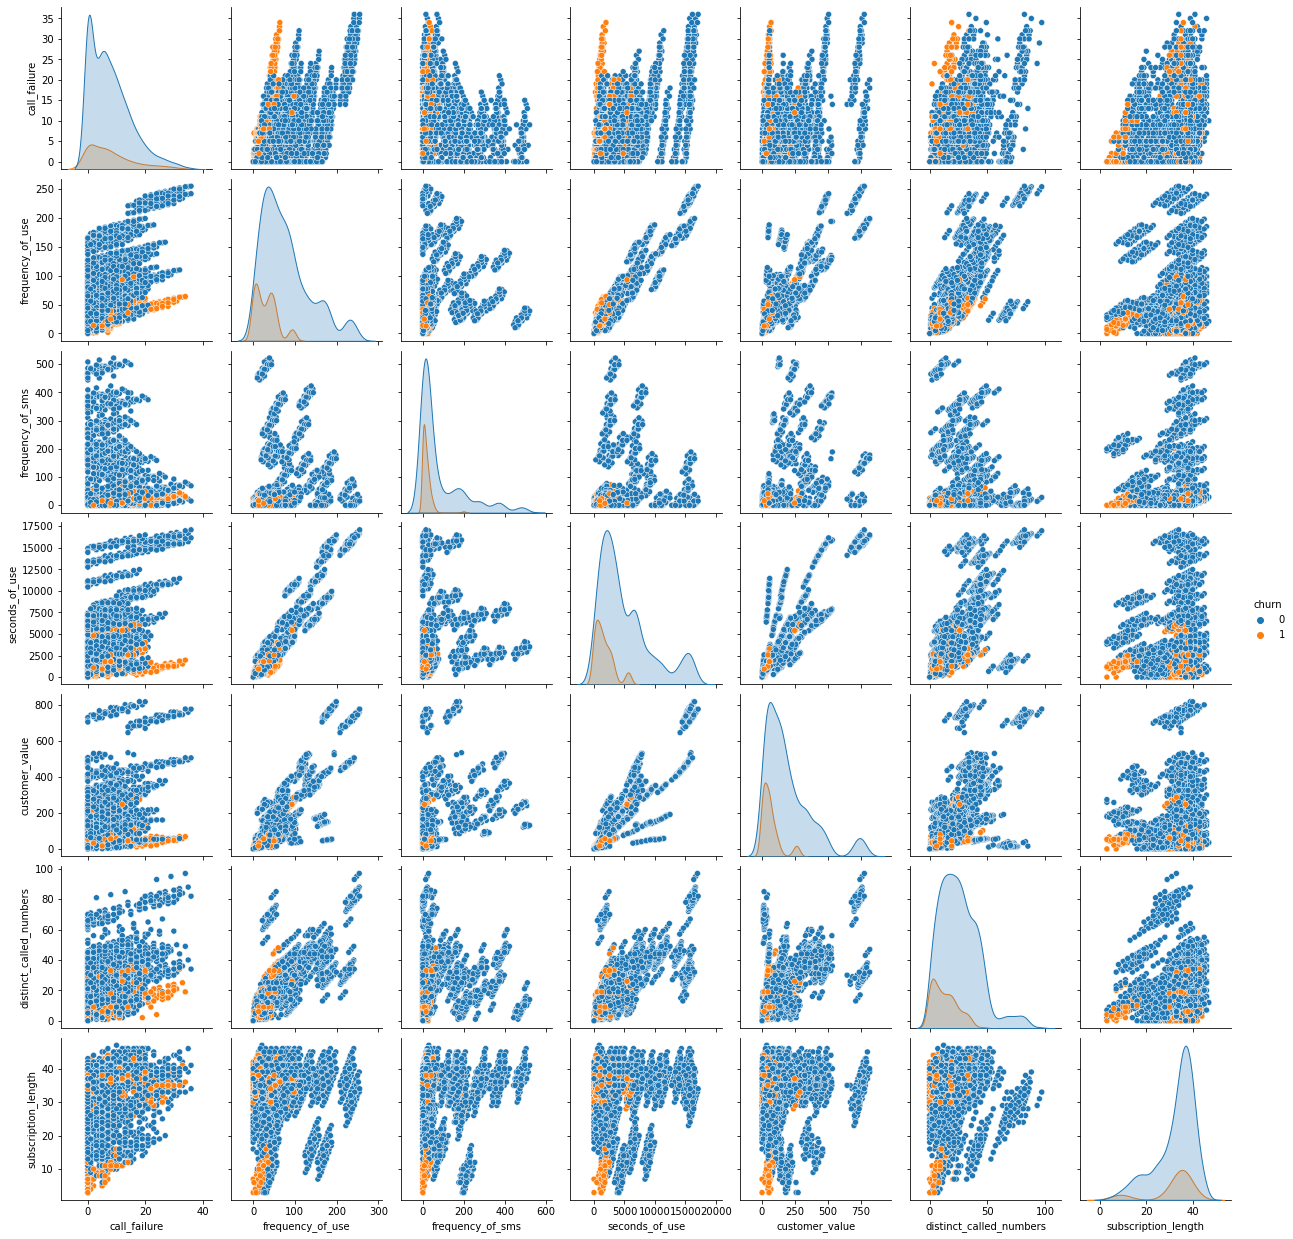

In [34]:
allhist('call_failure','frequency_of_use','frequency_of_sms','seconds_of_use','customer_value',
        'distinct_called_numbers','subscription_length')

From the above pairplot, we see that the less the second_of_use, frequency_of_sms and customer_value the more the customers tend to churn.

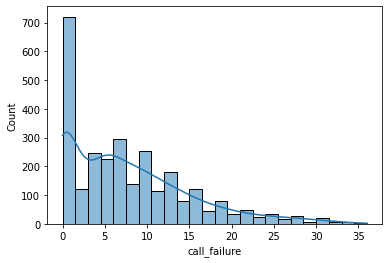

In [35]:
histogram('call_failure')

In [36]:
def binhist(col):
    sns.histplot(customer_churn_data_nodup[col], bins=7)
    return plt.show()

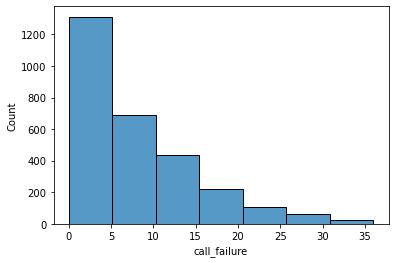

In [37]:
binhist('call_failure')

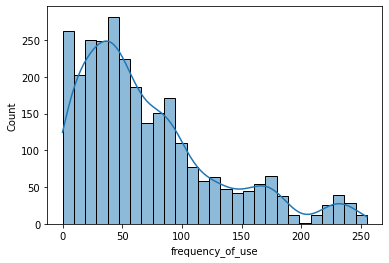

In [38]:
histogram('frequency_of_use')

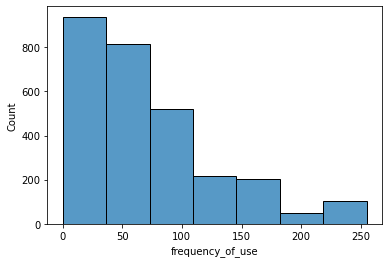

In [39]:
binhist('frequency_of_use')

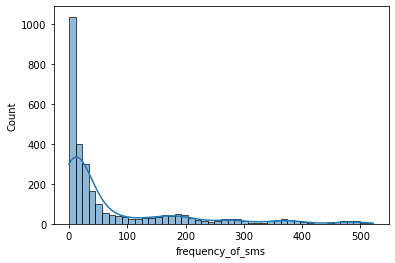

In [40]:
histogram('frequency_of_sms')

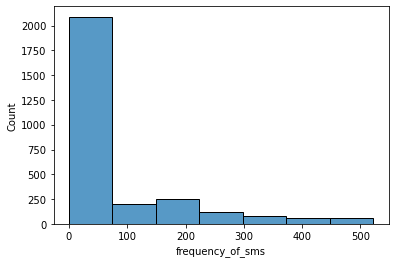

In [41]:
binhist('frequency_of_sms')

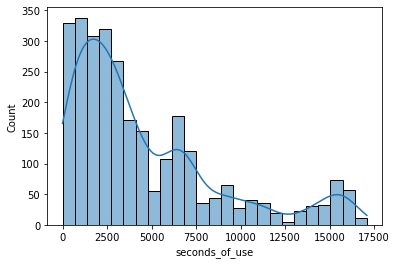

In [42]:
histogram('seconds_of_use')

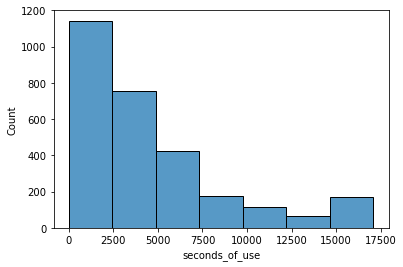

In [43]:
binhist('seconds_of_use')

In [44]:
# check the uses(sec)=6697
check_outlier = customer_churn_data_nodup[customer_churn_data_nodup['seconds_of_use']> 13750]
check_outlier

call_failure complains  subscription_length charge_amount  \
8                7         0                   38             0   
12              25         0                   38             3   
14               9         0                   37             0   
33              25         0                   31             3   
58              10         0                   40             1   
...            ...       ...                  ...           ...   
2983            36         0                   34             5   
3012            24         0                   39             3   
3014             8         0                   38             0   
3033            24         1                   32             3   
3062            30         0                   40             4   

      seconds_of_use  frequency_of_use  frequency_of_sms  \
8              13773               169                 0   
12             15140               225                54   
14             15485               182               150   
33             16075               238                 0   
58             13833               172                 5   
...              ...               ...               ...   
2983           17090               255                15   
3012           14735               220                36   
3014           15080               177               132   
3033           15670               233                 0   
3062           15445               231                61   

      distinct_called_numbers age_group tariff_plan status  churn  \
8                          44         3           1      1      0   
12                         32         3           1      1      0   
14                         30         2           1      1      0   
33                         80         2           2      1      0   
58                         46         3           1      1      0   
...                       ...       ...         ...    ...    ...   
2983                       82         2           2      1      0   
3012                       34         3           1      1      0   
3014                       32         2           1      1      0   
3033                       82         2           1      1      0   
3062                       34         3           1      1      0   

      customer_value  
8            413.190  
12           470.400  
14           764.325  
33           723.375  
58           416.490  
...              ...  
2983         775.800  
3012         452.850  
3014         738.000  
3033         705.150  
3062         481.650  

[204 rows x 13 columns]

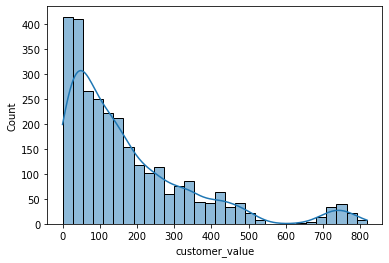

In [45]:
histogram('customer_value')

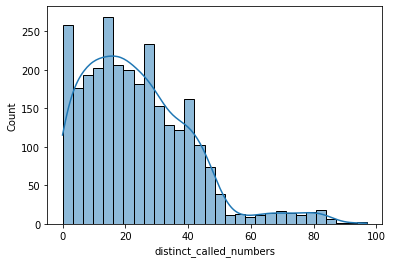

In [46]:
histogram('distinct_called_numbers')

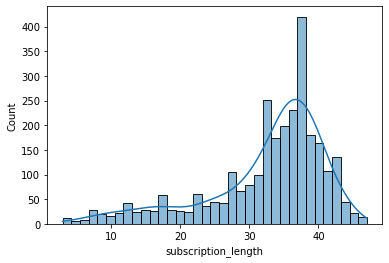

In [47]:
histogram('subscription_length')

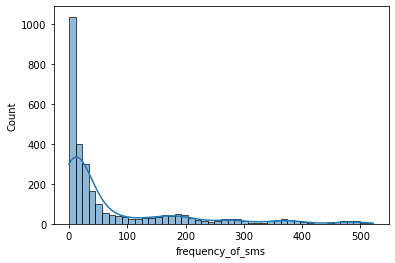

In [48]:
histogram('frequency_of_sms')

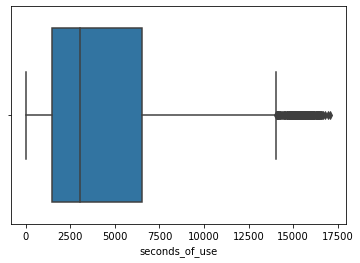

In [49]:
ax=sns.boxplot( data= customer_churn_data_nodup, x='seconds_of_use', hue='churn')

In [50]:
# Plot histogram contribution to churn

def histcont(col):
    fig = px.histogram(customer_churn_data_nodup, x=col, color= 'churn')
    return fig.show()

In [51]:
histcont('complains')

In [52]:
histcont('charge_amount')

In [53]:
histcont('age_group')

In [54]:
histcont('tariff_plan')

In [55]:
histcont('status')

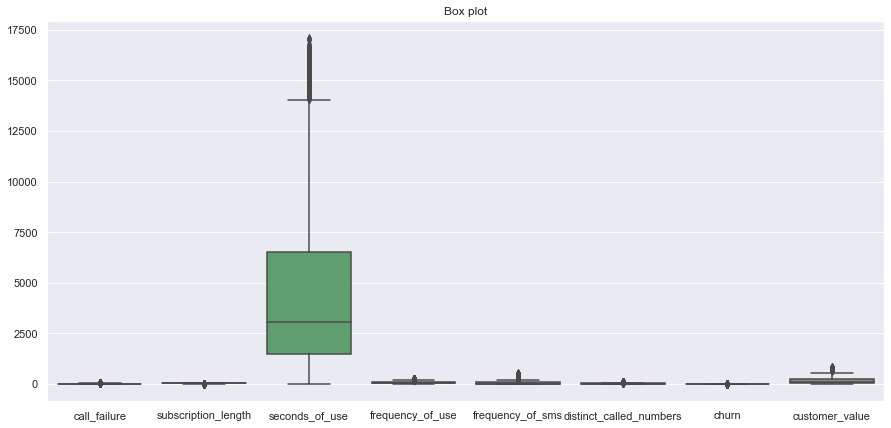

In [56]:
sns.set()
plt.figure(figsize=(15,7))
sns.boxplot(data=customer_churn_data_nodup)
plt.title("Box plot")
plt.show()

In [57]:
customer_churn_data_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 3131
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   object 
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   object 
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_sms         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   object 
 9   tariff_plan              2850 non-null   object 
 10  status                   2850 non-null   object 
 11  churn                    2850 non-null   int64  
 12  customer_value           2850 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 376.3+ KB


In [58]:
customer_churn_data_nodup['churn']=customer_churn_data_nodup['churn'].astype('category')

In [59]:
customer_churn_data_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 3131
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   call_failure             2850 non-null   int64   
 1   complains                2850 non-null   object  
 2   subscription_length      2850 non-null   int64   
 3   charge_amount            2850 non-null   object  
 4   seconds_of_use           2850 non-null   int64   
 5   frequency_of_use         2850 non-null   int64   
 6   frequency_of_sms         2850 non-null   int64   
 7   distinct_called_numbers  2850 non-null   int64   
 8   age_group                2850 non-null   object  
 9   tariff_plan              2850 non-null   object  
 10  status                   2850 non-null   object  
 11  churn                    2850 non-null   category
 12  customer_value           2850 non-null   float64 
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 3

In [60]:
customer_churn_data_nodup.loc[:, ['complains', 'charge_amount', 'age_group', 'tariff_plan', 'status']]= customer_churn_data_nodup.loc[:, ['complains', 'charge_amount', 'age_group', 'tariff_plan', 'status']].astype(int)

### Prepare data for the model building

In [61]:
# Assigning y as input and X as output
y= customer_churn_data_nodup['churn'] # extract the targeted variable 'churn'
new_data= customer_churn_data_nodup.drop(['churn'], axis=1)
X = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values
#values used to convert the dataframe to a numpy array before perform the normalization to the new data


In [62]:
# view the X values
X[0:7]

call_failure  complains  subscription_length  charge_amount  \
0      0.222222        0.0             0.795455            0.0   
1      0.000000        0.0             0.818182            0.0   
2      0.277778        0.0             0.772727            0.0   
3      0.277778        0.0             0.795455            0.0   
4      0.083333        0.0             0.795455            0.0   
5      0.305556        0.0             0.795455            0.1   
6      0.111111        0.0             0.795455            0.0   

   seconds_of_use  frequency_of_use  frequency_of_sms  \
0        0.255705          0.278431          0.009579   
1        0.018607          0.019608          0.013410   
2        0.143534          0.235294          0.687739   
3        0.245641          0.258824          0.001916   
4        0.140023          0.227451          0.003831   
5        0.220889          0.321569          0.061303   
6        0.138092          0.152941          0.545977   

   distinct_called_numbers  age_group  tariff_plan  status  customer_value  
0                 0.175258       0.50          0.0     0.0        0.162172  
1                 0.041237       0.25          0.0     1.0        0.021354  
2                 0.247423       0.50          0.0     0.0        0.221721  
3                 0.360825       0.00          0.0     0.0        0.308787  
4                 0.340206       0.00          0.0     0.0        0.177068  
5                 0.288660       0.50          0.0     0.0        0.150248  
6                 0.185567       0.50          0.0     0.0        0.191158

In [63]:
# view the y values
y[0:7]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: churn, dtype: category
Categories (2, int64): [0, 1]

In [121]:
# split data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 1)

# split train data into train set and validation set
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state= 1)

In [122]:
# check the sizes of the data splits
X_train.shape[0]

1824

In [127]:
X_train.shape[1]

12

In [124]:
X_val.shape[0]

456

In [126]:
X_test.shape[0]

570

In [125]:
X_val.shape[1]

12

In [123]:
X_train.shape[1]# 12 columns

12

### Apply Machine Learning Algorithms

The RandomForestClassifier is an algorithm used for classification task that build a collection of
decision trees at traininig time. and then aggregates 

In [66]:
# import RandomForestClassifier from sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# create an instance of the RandomForestClassifier called model_rf
# the n_estimators parameter specifies the number of decision trees to build in the random forest
# the random_state parameter ensures that the results are reproducible across different runs of the codes.
# the ravel() method is used to convert 2D or more D array to 1D'.is a 1D array

model_rf= RandomForestClassifier(n_estimators = 5, random_state = 1)
#model_rf.fit(X_train,y_train.values.ravel()) # the fit()method requires a 1D array for the second argument
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=1)

In [67]:
y_train[0:5]

56      0
208     0
2595    0
1860    0
2936    0
Name: churn, dtype: category
Categories (2, int64): [0, 1]

In [68]:
y_train.shape # the dimension is 1D with 2280 elements since, no value after comma.

(2280,)

In [69]:
y_predict1=model_rf.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       493
           1       0.76      0.71      0.74        77

    accuracy                           0.93       570
   macro avg       0.86      0.84      0.85       570
weighted avg       0.93      0.93      0.93       570



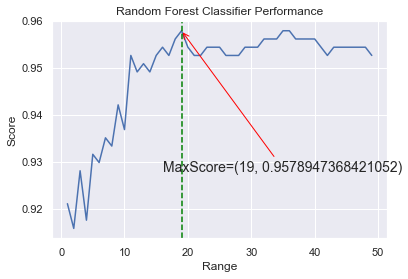

[0.9210526315789473,
 0.9157894736842105,
 0.9280701754385965,
 0.9175438596491228,
 0.9315789473684211,
 0.9298245614035088,
 0.9350877192982456,
 0.9333333333333333,
 0.9421052631578948,
 0.9368421052631579,
 0.9526315789473684,
 0.9491228070175438,
 0.9508771929824561,
 0.9491228070175438,
 0.9526315789473684,
 0.9543859649122807,
 0.9526315789473684,
 0.956140350877193,
 0.9578947368421052,
 0.9543859649122807,
 0.9526315789473684,
 0.9526315789473684,
 0.9543859649122807,
 0.9543859649122807,
 0.9543859649122807,
 0.9526315789473684,
 0.9526315789473684,
 0.9526315789473684,
 0.9543859649122807,
 0.9543859649122807,
 0.9543859649122807,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9578947368421052,
 0.9578947368421052,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9543859649122807,
 0.9526315789473684,
 0.9543859649122807,
 0.9543859649122807,
 0.9543859649122807,
 0.9543859649122807,
 0.9543859649122807,
 0.9543859649122807,


In [71]:
# Find the best number for n_estimators
score_array = []
for number in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = number, random_state = 1) #set K neighbor as 3
    rf_loop.fit(X_train,y_train)
    #score_array.append(rf_loop.score(X_test,y_test))
    score = rf_loop.score(X_test,y_test)
    score_array.append(score)
    #print("Number of estimators:", number, "Score:", score)
    
best_score = max(score_array)
best_estimator = score_array.index(best_score) + 1

# Add a dotted line and arrow with x, y value
plt.plot(range(1,50),score_array)
plt.axvline(x=19, linestyle='--', color='green') # add dotted line at x=19
plt.annotate(f'MaxScore={(best_estimator,best_score)}', xy=(best_estimator,best_score), xytext=(best_estimator-3,best_score-0.03), 
             arrowprops=dict(arrowstyle='->', color='red'),fontsize=14)

plt.xlabel("Range")
plt.ylabel("Score")
plt.title("Random Forest Classifier Performance")
plt.show()

score_array


In [72]:
print("Best score:", best_score)
print("Best estimator:", best_estimator)

Best score: 0.9578947368421052
Best estimator: 19


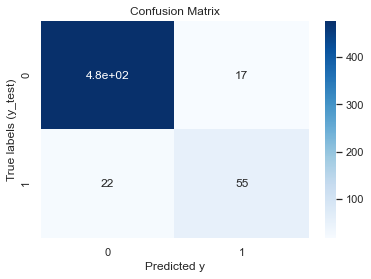

In [73]:
# Another way of looking at the accuracy of the classifier
cm=confusion_matrix(y_test,y_predict1)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.xlabel('Predicted y')
plt.ylabel('True labels (y_test)')
plt.title('Confusion Matrix')
plt.show()

The diagonal values in the above heatmap represent the correctly classified samples. So, the algorithms correctly classified 55 positive samples and 4.8e+02 negative samples. The off-diagonal values represent the misclassified samples. There are 22 false positive(predicted positive, but true_labels negative) and 17 false negative(predicted negative, but true_labels positive).
A good classification algorithm will have high values on the diagonal and low values off the diagonal. 

Support Vector Machine Classification

In [74]:
# import CalibratedClassifierCV to returning the predicted class label to a probability score
# probability of the prediction being correct

from sklearn.calibration import CalibratedClassifierCV 
from sklearn.svm import LinearSVC
#from sklearn.model_selection import GridSearchCV

# max_iter parameter in scikit-learn determine the max number of iterations 
# If the model is overfitting or taking too long to train, reducing the max_iter value an be helpful
# define the parameter grid to search
#param_grid= {'max_iter':[1000, 2000,3000]}

# Create the LinearSVC model
model_svm = LinearSVC(max_iter=1000)
model_svm= CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)

# in this case I dont need to Create the GridSearchCv object with 3-fold cross-validation
#grid_search= GridSearchCV(calibrate_model_svm, param_grid, cv=3)

# It's because max_iter=1000 has same output of 2000
#print("Best max_iter value:", grid_search.best_params_['max_iter'])

CalibratedClassifierCV(base_estimator=LinearSVC())

In [75]:
# Evaluate the model using test data
y_predict2= model_svm.predict(X_test)

In [76]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       493
           1       0.68      0.42      0.52        77

    accuracy                           0.89       570
   macro avg       0.80      0.69      0.73       570
weighted avg       0.88      0.89      0.88       570



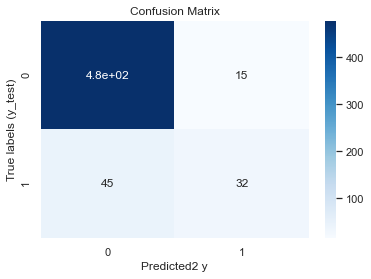

In [77]:
# Another way of looking at the accuracy of the classifier
cm=confusion_matrix(y_test,y_predict2)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.xlabel('Predicted2 y')
plt.ylabel('True labels (y_test)')
plt.title('Confusion Matrix')
plt.show()

KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [79]:
y_predict3=model_knn.predict(X_test)

C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [80]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       493
           1       0.81      0.81      0.81        77

    accuracy                           0.95       570
   macro avg       0.89      0.89      0.89       570
weighted avg       0.95      0.95      0.95       570



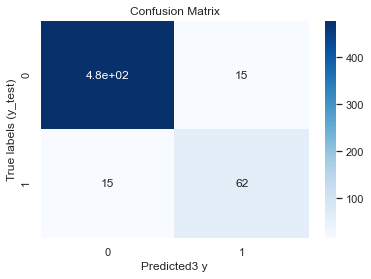

In [81]:
# Another way of looking at the accuracy of the classifier
cm=confusion_matrix(y_test,y_predict3)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.xlabel('Predicted3 y')
plt.ylabel('True labels (y_test)')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes Classifier

In [82]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(X_train, y_train)
y_predict4=model_gnb.predict(X_test)
print(classification_report(y_test, y_predict4))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       493
           1       0.34      0.96      0.50        77

    accuracy                           0.74       570
   macro avg       0.67      0.84      0.67       570
weighted avg       0.90      0.74      0.78       570



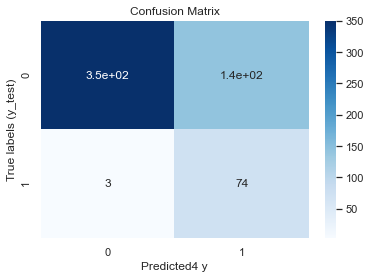

In [83]:
# Another way of looking at the accuracy of the classifier
cm=confusion_matrix(y_test,y_predict4)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.xlabel('Predicted4 y')
plt.ylabel('True labels (y_test)')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Classification

In [84]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_predict5=model_dt.predict(X_test)
print(classification_report(y_test, y_predict5))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       493
           1       0.76      0.73      0.74        77

    accuracy                           0.93       570
   macro avg       0.86      0.85      0.85       570
weighted avg       0.93      0.93      0.93       570



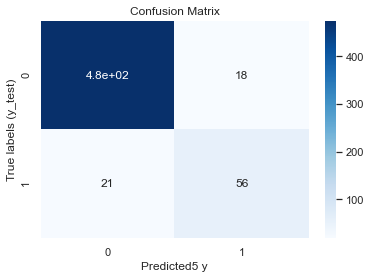

In [85]:
# Another way of looking at the accuracy of the classifier
cm=confusion_matrix(y_test,y_predict5)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.xlabel('Predicted5 y')
plt.ylabel('True labels (y_test)')
plt.title('Confusion Matrix')
plt.show()

model_names = ['model_rf', 'model_svm' , 'model_knn', 'model_gnb', 'model_dt']
#model = [RandomForestClassifier, ]
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_predict5=model_dt.predict(X_test)
print(classification_report(y_test, y_predict5))

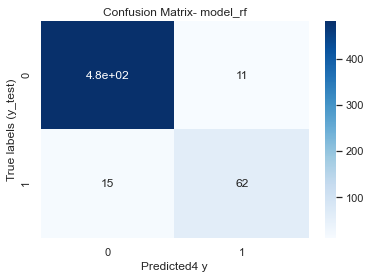

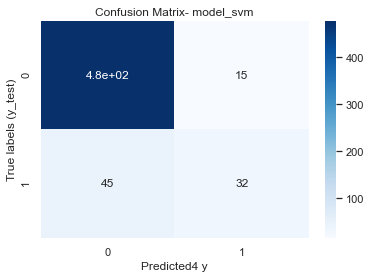

C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



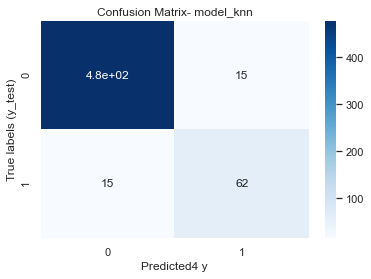

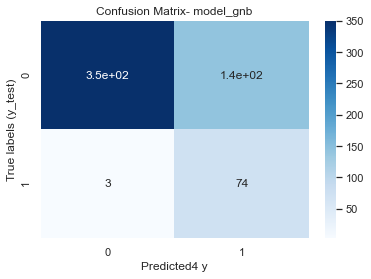

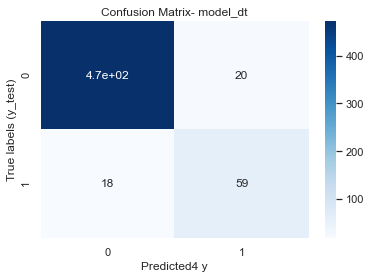

In [86]:
# Create a list of models
model_names= ['model_rf', 'model_svm' , 'model_knn', 'model_gnb', 'model_dt']
models = [RandomForestClassifier(),CalibratedClassifierCV(), KNeighborsClassifier(), GaussianNB(),
          DecisionTreeClassifier()]

# Loop over the models and plot the confusion matrix
for model, name in zip(models, model_names):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True, cmap='Blues')
    plt.xlabel('Predicted4 y')
    plt.ylabel('True labels (y_test)')
    plt.title(f'Confusion Matrix- {name}')
    plt.show()

In [87]:
# Create a list of models
model_names= ['model_rf', 'model_svm' , 'model_knn', 'model_gnb', 'model_dt']
models = [RandomForestClassifier(),CalibratedClassifierCV(), KNeighborsClassifier(), GaussianNB(),
          DecisionTreeClassifier()]

# Loop over the models and print the accuracy for each model
for model, name in zip(models, model_names):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_score= model.score(X_test, y_test)
    print(f'Accuracy for {name} is {accuracy_score}')

Accuracy for model_rf is 0.9526315789473684
Accuracy for model_svm is 0.8947368421052632
Accuracy for model_knn is 0.9473684210526315
Accuracy for model_gnb is 0.743859649122807
Accuracy for model_dt is 0.9385964912280702


C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [88]:
# compate the classification_report for each algorithm using scikit-learn

# Loop over the models and print the accuracy for each model
for model, name in zip(models, model_names):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    class_report= classification_report(y_test, y_pred)
    #accuracy_score= model.score(X_test, y_test)
    print(f'Classification Report for {name}:')
    print(class_report)


Classification Report for model_rf:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       493
           1       0.84      0.77      0.80        77

    accuracy                           0.95       570
   macro avg       0.90      0.87      0.89       570
weighted avg       0.95      0.95      0.95       570

Classification Report for model_svm:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       493
           1       0.68      0.42      0.52        77

    accuracy                           0.89       570
   macro avg       0.80      0.69      0.73       570
weighted avg       0.88      0.89      0.88       570

Classification Report for model_knn:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       493
           1       0.81      0.81      0.81        77

    accuracy                           0.95       570
   macro avg      

C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [89]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
list= []
def models_lr(x,y):
    mod = {}
    model = LogisticRegression().fit(x,y)
    y_pred = model.predict(X_test)
    mod['Model'] = 'LogisticRegression'
    mod['Train_Score'] = model.score(X_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,y_pred)
    mod['f1score'] = metrics.f1_score(y_test,y_pred)
    mod['recall'] = metrics.recall_score(y_test, y_pred)
    mod['precision'] = metrics.precision_score(y_test, y_pred)
    model.predict_proba(X_test)
    fpr6, tpr6, thresh6 = roc_curve(y_test, model.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)
    return mod
list.append(models_lr(X_train,y_train))

In [90]:
df = pd.DataFrame(list)
df

Model  Train_Score  Test_accuracy   f1score    recall  \
0  LogisticRegression     0.902632       0.894737  0.508197  0.402597   

   precision  roc_auc  
0   0.688889   0.6871

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
listG= []
def models_gb(x,y):
    modg = {}
    model_gbc = GradientBoostingClassifier().fit(x,y)
    y_pred = model_gbc.predict(X_test)
    modg['Model'] = 'Gradient Boosting'
    modg['Train_Score'] = model_gbc.score(X_train,y_train)
    modg['Test_accuracy'] = metrics.accuracy_score(y_test,y_pred)
    modg['f1score'] = metrics.f1_score(y_test,y_pred)
    modg['recall'] = metrics.recall_score(y_test, y_pred)
    modg['precision'] = metrics.precision_score(y_test, y_pred)
    model_gbc.predict_proba(X_test)
    fpr7, tpr7, thresh7 = roc_curve(y_test, model_gbc.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
    modg['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)
    return modg
listG.append(models_gb(X_train,y_train))

In [92]:
df2=pd.DataFrame(listG)
df2

Model  Train_Score  Test_accuracy   f1score    recall  \
0  Gradient Boosting     0.976754       0.940351  0.767123  0.727273   

   precision   roc_auc  
0   0.811594  0.850452

In [93]:
ndf=pd.concat([df, df2], ignore_index=True) # ignore_index is reset the index of the concateenated df
ndf

Model  Train_Score  Test_accuracy   f1score    recall  \
0  LogisticRegression     0.902632       0.894737  0.508197  0.402597   
1   Gradient Boosting     0.976754       0.940351  0.767123  0.727273   

   precision   roc_auc  
0   0.688889  0.687100  
1   0.811594  0.850452

### Neural Networks

Neural networks can be build by using Python Keras library. This model is mimic the structure and function of human brain. In training ANN model, the batch size is the number of samples that are processesed at once by the model. It can lead to slower training but can improve the quality of the model.A larger batch size can lead to faster training but can cause the model to overfit. `epochs` is the number of times the model will see the entire dataset during training. The larger the epochs value may improve the quallity of the model but it is a risk of overfitting. verbose of 0 indicates no output.

In [94]:
from keras.models import Sequential
from keras.layers import Dense
model_nn = Sequential() 
model_nn.add(Dense(10, input_dim=X_train.shape[1], activation='relu')) # 10 is number of nodes between total column(input_dim) to 1.
model_nn.add(Dense(5, activation='relu')) 
model_nn.add(Dense(1, activation='sigmoid')) 
#compile the model
# the compile function is used  to specify the loss function, optimizer and
# metrics to use during training.the metrics ude here is accuracy
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_predd = model_nn.predict(X_test)
y_pred = np.round(y_predd)

18/18 [==============================] - 0s 821us/step


In [95]:
#modnn['Train_Score'] = model_nn.evaluate(X_train,y_train, verbose=0)
# this will give training loss and training accuracy
# [0.15983381867408752, 0.930701732635498]

In [96]:
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [97]:
from keras.models import Sequential
from keras.layers import Dense
listnn= []
def models_nn(x,y):
    modnn = {}
    model_nn = Sequential() 
    model_nn.add(Dense(11, input_dim=X_train.shape[1], activation='relu')) # 10 is number of nodes between total column(input_dim) to 1.
    model_nn.add(Dense(5, activation='relu')) 
    model_nn.add(Dense(1, activation='sigmoid')) 
    #compile the model
    # the compile function is used  to specify the loss function, optimizer and
    # metrics to use during training.the metrics ude here is accuracy
    model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    #y_pred = model_nn.predict(X_test)
    y_predd = model_nn.predict(X_test)
    y_pred = np.round(y_predd)
    history=model_nn.fit(X_train, y_train, epochs=10, batch_size=32)# train the model
    
    modnn['Model'] = 'Neural Network'
    modnn['Train_Score'] = history.history['accuracy'][-1]# this will give training loss and training accuracy
    modnn['Test_accuracy'] = metrics.accuracy_score(y_test,y_pred)
    modnn['f1score'] = metrics.f1_score(y_test,y_pred)
    modnn['recall'] = metrics.recall_score(y_test, y_pred)
    modnn['precision'] = metrics.precision_score(y_test, y_pred)
    #model_nn.predict_proba(X_test)[:,1]
    fpr8, tpr8, thresh8 = roc_curve(y_test, model_nn.predict(X_test),
                                    pos_label = 1)
    modnn['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)
    return modnn
listnn.append(models_nn(X_train,y_train))

18/18 [==============================] - 0s 821us/step
Epoch 1/10
72/72 [==============================] - 0s 995us/step - loss: 0.1928 - accuracy: 0.9175
Epoch 2/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9184
Epoch 3/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9197
Epoch 4/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9189
Epoch 5/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9202
Epoch 6/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9171
Epoch 7/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9158
Epoch 8/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9202
Epoch 9/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9189
Epoch 10/10
18/18 [==============================] - 0s 765us

In [98]:
# training loss indicates the errors of a model during trainig, minimizing it may lead to
# overfitting, we can see how well this model fitting the training data
# the goal of ml model is minimize the  training loss to make the model accurate
dfann=pd.DataFrame(listnn)
dfann

Model  Train_Score  Test_accuracy   f1score    recall  precision  \
0  Neural Network     0.916667       0.910526  0.585366  0.467532   0.782609   

    roc_auc  
0  0.723624

In [99]:
dflgn=pd.concat([ndf, dfann], ignore_index=True) # ignore_index is reset the index of the concateenated df
dflgn

Model  Train_Score  Test_accuracy   f1score    recall  \
0  LogisticRegression     0.902632       0.894737  0.508197  0.402597   
1   Gradient Boosting     0.976754       0.940351  0.767123  0.727273   
2      Neural Network     0.916667       0.910526  0.585366  0.467532   

   precision   roc_auc  
0   0.688889  0.687100  
1   0.811594  0.850452  
2   0.782609  0.723624

In [100]:
#model_names= ['model_rf', 'model_svm' , 'model_knn', 'model_gnb', 'model_dt']
#models = [RandomForestClassifier(),CalibratedClassifierCV(), KNeighborsClassifier(), GaussianNB(),
          #DecisionTreeClassifier()]
listrf= []
def models_rf(x,y):
    modrf = {}
    modelrf = RandomForestClassifier().fit(x,y)
    y_pred = modelrf.predict(X_test)
    modrf['Model'] = 'Random Forest'
    modrf['Train_Score'] = modelrf.score(X_train,y_train)
    modrf['Test_accuracy'] = metrics.accuracy_score(y_test,y_pred)
    modrf['f1score'] = metrics.f1_score(y_test,y_pred)
    modrf['recall'] = metrics.recall_score(y_test, y_pred)
    modrf['precision'] = metrics.precision_score(y_test, y_pred)
    modelrf.predict_proba(X_test)
    fpr1, tpr1, thresh1 = roc_curve(y_test, modelrf.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
    modrf['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)
    return modrf
listrf.append(models_rf(X_train,y_train))

In [101]:
dfrf=pd.DataFrame(listrf)
dfrf

Model  Train_Score  Test_accuracy   f1score    recall  precision  \
0  Random Forest     0.996491       0.952632  0.816327  0.779221   0.857143   

    roc_auc  
0  0.879468

In [102]:
dflgnrf=pd.concat([dflgn, dfrf], ignore_index=True) # ignore_index is reset the index of the concateenated df
dflgnrf

Model  Train_Score  Test_accuracy   f1score    recall  \
0  LogisticRegression     0.902632       0.894737  0.508197  0.402597   
1   Gradient Boosting     0.976754       0.940351  0.767123  0.727273   
2      Neural Network     0.916667       0.910526  0.585366  0.467532   
3       Random Forest     0.996491       0.952632  0.816327  0.779221   

   precision   roc_auc  
0   0.688889  0.687100  
1   0.811594  0.850452  
2   0.782609  0.723624  
3   0.857143  0.879468

In [103]:
#model_names= ['model_rf', 'model_svm' , 'model_knn', 'model_gnb', 'model_dt']
#models = [RandomForestClassifier(),CalibratedClassifierCV(), KNeighborsClassifier(), GaussianNB(),
          #DecisionTreeClassifier()]
listsvm= []
def models_svm(x,y):
    modsvm = {}
    modelsvm = CalibratedClassifierCV().fit(x,y)
    y_pred = modelsvm.predict(X_test)
    modsvm['Model'] = 'Support Vector Machine'
    modsvm['Train_Score'] = modelsvm.score(X_train,y_train)
    modsvm['Test_accuracy'] = metrics.accuracy_score(y_test,y_pred)
    modsvm['f1score'] = metrics.f1_score(y_test,y_pred)
    modsvm['recall'] = metrics.recall_score(y_test, y_pred)
    modsvm['precision'] = metrics.precision_score(y_test, y_pred)
    modelsvm.predict_proba(X_test)
    fpr2, tpr2, thresh2 = roc_curve(y_test, modelsvm.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
    modsvm['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)
    return modsvm
listsvm.append(models_svm(X_train,y_train))  


In [104]:
dfsvm=pd.DataFrame(listsvm)
dfsvm

Model  Train_Score  Test_accuracy   f1score    recall  \
0  Support Vector Machine     0.901316       0.894737  0.516129  0.415584   

   precision   roc_auc  
0   0.680851  0.692579

In [105]:
dflgnrfsvm=pd.concat([dflgnrf, dfsvm], ignore_index=True) # ignore_index is reset the index of the concateenated df
dflgnrfsvm

Model  Train_Score  Test_accuracy   f1score    recall  \
0      LogisticRegression     0.902632       0.894737  0.508197  0.402597   
1       Gradient Boosting     0.976754       0.940351  0.767123  0.727273   
2          Neural Network     0.916667       0.910526  0.585366  0.467532   
3           Random Forest     0.996491       0.952632  0.816327  0.779221   
4  Support Vector Machine     0.901316       0.894737  0.516129  0.415584   

   precision   roc_auc  
0   0.688889  0.687100  
1   0.811594  0.850452  
2   0.782609  0.723624  
3   0.857143  0.879468  
4   0.680851  0.692579

In [106]:
listknn= []
def models_knn(x,y):
    modknn = {}
    modelknn = KNeighborsClassifier().fit(x,y)
    y_pred = modelknn.predict(X_test)
    modknn['Model'] = 'KNN'
    modknn['Train_Score'] = modelknn.score(X_train,y_train)
    modknn['Test_accuracy'] = metrics.accuracy_score(y_test,y_pred)
    modknn['f1score'] = metrics.f1_score(y_test,y_pred)
    modknn['recall'] = metrics.recall_score(y_test, y_pred)
    modknn['precision'] = metrics.precision_score(y_test, y_pred)
    modelknn.predict_proba(X_test)
    fpr3, tpr3, thresh3 = roc_curve(y_test, modelknn.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
    modknn['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)
    return modknn
listknn.append(models_knn(X_train,y_train))  

C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [107]:
dfknn=pd.DataFrame(listknn)
dfknn

Model  Train_Score  Test_accuracy   f1score    recall  precision   roc_auc
0   KNN      0.97193       0.947368  0.805195  0.805195   0.805195  0.887384

In [108]:
dfknnsvm=pd.concat([dflgnrfsvm, dfknn], ignore_index=True) # ignore_index is reset the index of the concateenated df
dfknnsvm

Model  Train_Score  Test_accuracy   f1score    recall  \
0      LogisticRegression     0.902632       0.894737  0.508197  0.402597   
1       Gradient Boosting     0.976754       0.940351  0.767123  0.727273   
2          Neural Network     0.916667       0.910526  0.585366  0.467532   
3           Random Forest     0.996491       0.952632  0.816327  0.779221   
4  Support Vector Machine     0.901316       0.894737  0.516129  0.415584   
5                     KNN     0.971930       0.947368  0.805195  0.805195   

   precision   roc_auc  
0   0.688889  0.687100  
1   0.811594  0.850452  
2   0.782609  0.723624  
3   0.857143  0.879468  
4   0.680851  0.692579  
5   0.805195  0.887384

In [109]:
#model_names= ['model_rf', 'model_svm' , 'model_knn', 'model_gnb', 'model_dt']
#models = [RandomForestClassifier(),CalibratedClassifierCV(), KNeighborsClassifier(), GaussianNB(),
          #DecisionTreeClassifier()]
listgnb= []
def models_gnb(x,y):
    modgnb = {}
    modelgnb = GaussianNB().fit(x,y)
    y_pred = modelgnb.predict(X_test)
    modgnb['Model'] = 'Naive Bayes Classifier'
    modgnb['Train_Score'] = modelgnb.score(X_train,y_train)
    modgnb['Test_accuracy'] = metrics.accuracy_score(y_test,y_pred)
    modgnb['f1score'] = metrics.f1_score(y_test,y_pred)
    modgnb['recall'] = metrics.recall_score(y_test, y_pred)
    modgnb['precision'] = metrics.precision_score(y_test, y_pred)
    modelgnb.predict_proba(X_test)
    modgnb['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)
    return modgnb
listgnb.append(models_gnb(X_train,y_train))  

In [110]:
dfgnb=pd.DataFrame(listgnb)
dfgnb

Model  Train_Score  Test_accuracy   f1score    recall  \
0  Naive Bayes Classifier     0.753947        0.74386  0.503401  0.961039   

   precision   roc_auc  
0   0.341014  0.835489

In [111]:
dfksg=pd.concat([dfknnsvm, dfgnb], ignore_index=True) # ignore_index is reset the index of the concateenated df
dfksg

Model  Train_Score  Test_accuracy   f1score    recall  \
0      LogisticRegression     0.902632       0.894737  0.508197  0.402597   
1       Gradient Boosting     0.976754       0.940351  0.767123  0.727273   
2          Neural Network     0.916667       0.910526  0.585366  0.467532   
3           Random Forest     0.996491       0.952632  0.816327  0.779221   
4  Support Vector Machine     0.901316       0.894737  0.516129  0.415584   
5                     KNN     0.971930       0.947368  0.805195  0.805195   
6  Naive Bayes Classifier     0.753947       0.743860  0.503401  0.961039   

   precision   roc_auc  
0   0.688889  0.687100  
1   0.811594  0.850452  
2   0.782609  0.723624  
3   0.857143  0.879468  
4   0.680851  0.692579  
5   0.805195  0.887384  
6   0.341014  0.835489

In [112]:
#model_names= ['model_rf', 'model_svm' , 'model_knn', 'model_gnb', 'model_dt']
#models = [RandomForestClassifier(),CalibratedClassifierCV(), KNeighborsClassifier(), GaussianNB(),
          #DecisionTreeClassifier()]
listdt= []
def models_dt(x,y):
    moddt = {}
    modeldt = DecisionTreeClassifier().fit(x,y)
    y_pred = modeldt.predict(X_test)
    moddt['Model'] = 'Decision Tree'
    moddt['Train_Score'] = modeldt.score(X_train,y_train)
    moddt['Test_accuracy'] = metrics.accuracy_score(y_test,y_pred)
    moddt['f1score'] = metrics.f1_score(y_test,y_pred)
    moddt['recall'] = metrics.recall_score(y_test, y_pred)
    moddt['precision'] = metrics.precision_score(y_test, y_pred)
    modeldt.predict_proba(X_test)
    #fpr5, tpr5, thresh5 = roc_curve(y_test, modeldt.predict_proba(X_test)[:, 1],
                                    #pos_label = 1)
    moddt['roc_auc'] = metrics.roc_auc_score(y_test,y_pred)
    return moddt
listdt.append(models_dt(X_train,y_train))  

In [113]:
dfdt=pd.DataFrame(listdt)
dfdt

Model  Train_Score  Test_accuracy   f1score    recall  precision  \
0  Decision Tree     0.996491        0.94386  0.792208  0.792208   0.792208   

    roc_auc  
0  0.879877

In [114]:
dfksgt=pd.concat([dfksg, dfdt], ignore_index=True) # ignore_index is reset the index of the concateenated df
dfksgt

Model  Train_Score  Test_accuracy   f1score    recall  \
0      LogisticRegression     0.902632       0.894737  0.508197  0.402597   
1       Gradient Boosting     0.976754       0.940351  0.767123  0.727273   
2          Neural Network     0.916667       0.910526  0.585366  0.467532   
3           Random Forest     0.996491       0.952632  0.816327  0.779221   
4  Support Vector Machine     0.901316       0.894737  0.516129  0.415584   
5                     KNN     0.971930       0.947368  0.805195  0.805195   
6  Naive Bayes Classifier     0.753947       0.743860  0.503401  0.961039   
7           Decision Tree     0.996491       0.943860  0.792208  0.792208   

   precision   roc_auc  
0   0.688889  0.687100  
1   0.811594  0.850452  
2   0.782609  0.723624  
3   0.857143  0.879468  
4   0.680851  0.692579  
5   0.805195  0.887384  
6   0.341014  0.835489  
7   0.792208  0.879877

In [115]:
dfksgt.sort_values('roc_auc')

Model  Train_Score  Test_accuracy   f1score    recall  \
0      LogisticRegression     0.902632       0.894737  0.508197  0.402597   
4  Support Vector Machine     0.901316       0.894737  0.516129  0.415584   
2          Neural Network     0.916667       0.910526  0.585366  0.467532   
6  Naive Bayes Classifier     0.753947       0.743860  0.503401  0.961039   
1       Gradient Boosting     0.976754       0.940351  0.767123  0.727273   
3           Random Forest     0.996491       0.952632  0.816327  0.779221   
7           Decision Tree     0.996491       0.943860  0.792208  0.792208   
5                     KNN     0.971930       0.947368  0.805195  0.805195   

   precision   roc_auc  
0   0.688889  0.687100  
4   0.680851  0.692579  
2   0.782609  0.723624  
6   0.341014  0.835489  
1   0.811594  0.850452  
3   0.857143  0.879468  
7   0.792208  0.879877  
5   0.805195  0.887384

Model_rf and model_knn have the same accuracy. Accuracy alone is not sufficient to evaluate the performance of a model. It is essential to consider other metrics such as `precision`, `recall`, `F1 score` and `ROC curve`. **Precision** is a measure of the accuracy provided that a class label has been predicted where precision = TP / (TP + FP). **Recall** is the true positive rate where recall = TP / (TP + FN).The nearer the F1 score to the value 1 the better the precision and recall. Between these two model, model_rf has higher precision and recall compared to the model_knn. This means that the model_rf is better at identifying the relevant cases(high precision) and has fewer cases missed(high recall). In other words, model_rf is better at correctly identifying the cases that are truly positive and has fewer false positives. 

Now, let's look at the ROC(Receiver Operating Characteristic)curve. ROC curve is used in binary classifier. It illustrates the true positive rate (sensitivity) against the false positive rate for different classification thresholds. **AUC is the area under the ROC curve which indicates the performance of a binary classifier**. A perfect classifier has an AUC of 1. **The higher the overall accuracy of the test, the closer the curve to the top-left corner of the plot**. 


18/18 [==============================] - 0s 822us/step
Epoch 1/10
72/72 [==============================] - 0s 940us/step - loss: 0.1902 - accuracy: 0.9316
Epoch 2/10
72/72 [==============================] - 0s 970us/step - loss: 0.1893 - accuracy: 0.9316
Epoch 3/10
72/72 [==============================] - 0s 945us/step - loss: 0.1888 - accuracy: 0.9325
Epoch 4/10
72/72 [==============================] - 0s 949us/step - loss: 0.1884 - accuracy: 0.9285
Epoch 5/10
72/72 [==============================] - 0s 937us/step - loss: 0.1882 - accuracy: 0.9320
Epoch 6/10
72/72 [==============================] - 0s 947us/step - loss: 0.1875 - accuracy: 0.9316
Epoch 7/10
72/72 [==============================] - 0s 953us/step - loss: 0.1874 - accuracy: 0.9303
Epoch 8/10
72/72 [==============================] - 0s 964us/step - loss: 0.1858 - accuracy: 0.9316
Epoch 9/10
72/72 [==============================] - 0s 946us/step - loss: 0.1857 - accuracy: 0.9333
Epoch 10/10
18/18 [==========================

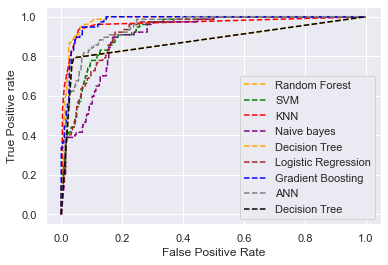

In [116]:
modeldt = DecisionTreeClassifier().fit(X_train,y_train)
modelgnb = GaussianNB().fit(X_train,y_train)
modelknn = KNeighborsClassifier().fit(X_train,y_train)
modelsvm = CalibratedClassifierCV().fit(X_train,y_train)
modelrf = RandomForestClassifier().fit(X_train,y_train)
model = LogisticRegression().fit(X_train,y_train)
model_gbc = GradientBoostingClassifier().fit(X_train,y_train)
model_nn = Sequential() 
model_nn.add(Dense(11, input_dim=X_train.shape[1], activation='relu')) # 10 is number of nodes between total column(input_dim) to 1.
model_nn.add(Dense(5, activation='relu')) 
model_nn.add(Dense(1, activation='sigmoid')) 
#compile the model
# the compile function is used  to specify the loss function, optimizer and
# metrics to use during training.the metrics ude here is accuracy
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    
y_predd = model_nn.predict(X_test)
y_pred = np.round(y_predd)
history=model_nn.fit(X_train, y_train, epochs=10, batch_size=32)
    
modelgnb.predict_proba(X_test)
modeldt.predict_proba(X_test)
modelknn.predict_proba(X_test)
modelsvm.predict_proba(X_test)
modelrf.predict_proba(X_test)
model.predict_proba(X_test)
model_gbc.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, modelrf.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, modelsvm.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, modelknn.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, modelgnb.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, modeldt.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test, model.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, model_gbc.predict_proba(X_test)[:, 1],
                                    pos_label = 1)
fpr8, tpr8, thresh8 = roc_curve(y_test, model_nn.predict(X_test),
                                    pos_label = 1)

plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Random Forest")
plt.plot(fpr2, tpr2, linestyle = "--", color = "green", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "red", label = "KNN")
plt.plot(fpr4, tpr4, linestyle = "--", color = "purple", label = "Naive bayes")
plt.plot(fpr5, tpr5, linestyle = "--", color = "orange", label = "Decision Tree")
plt.plot(fpr6, tpr6, linestyle = "--", color = "brown", label = "Logistic Regression")
plt.plot(fpr7, tpr7, linestyle = "--", color = "blue", label = "Gradient Boosting")
plt.plot(fpr8, tpr8, linestyle = "--", color = "grey", label = "ANN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

In [130]:
models = [modeldt,modelgnb,modelknn,modelsvm,modelrf,model,model_gbc,model_nn]
for model in models:
    model.fit(X_train, y_train)# train the model on training set
    # evaluate the model on training adn validation/test set
    if isinstance(model, Sequential):
        train_loss, train_acc= model.evaluate(X_train, y_train, verbose=0)
        val_loss, val_acc= model.evaluate(X_val, y_val, verbose=0)
        if val_loss > train_loss:
            print(f"The {model} is overfitting on the training set")
        else:
            print(f"The {model} is not overfitting")
    else: 
        train_score= model.score(X_train, y_train)
        val_score = model.score(X_val, y_val)
        if train_score > val_score:
            print(f"The {model} is overfitting on the training set")
        else:
            print(f"The {model} is not overfitting")

The DecisionTreeClassifier() is overfitting on the training set
The GaussianNB() is not overfitting
The KNeighborsClassifier() is overfitting on the training set
The CalibratedClassifierCV() is not overfitting


C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\johnw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



The RandomForestClassifier() is overfitting on the training set
57/57 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9342
The <keras.engine.sequential.Sequential object at 0x000001B42F584BB0> is overfitting on the training set
The GradientBoostingClassifier() is overfitting on the training set
57/57 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.9315
The <keras.engine.sequential.Sequential object at 0x000001B42F584BB0> is overfitting on the training set


### Conclusion

From the graph above, the curve of the model_knn is closer to the top-left corner(the highest overall accuracy).We can conclude that model_knn produced the best AUC score. Model_knn also show the best in accuracy compared to other models. The model_lr showed the lowest AUC score. Therefore I choose the model_knn as the best model since it can predict customer churn with 88.64% accurately.